# MNIST

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid =  train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

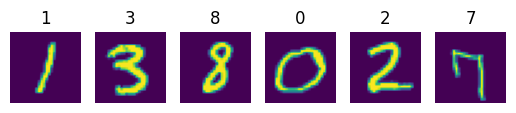

In [50]:
import numpy as np
import matplotlib.pyplot as plt

index = np.random.randint(low=0, high=48000, size=6)
for i, idx in enumerate(index):
    axe = plt.subplot(1, 6, i+1)
    axe.imshow(X=X_train[idx])
    axe.set_title(y_train[idx])
    axe.axis("off")
plt.show()

In [51]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  64 154
  103   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 196 254
  254   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  78 240 254
  254   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   9 109 24

In [52]:
print(y_train[0])

1


In [53]:
# 정규화
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### 모델 구성

In [56]:
model = models.Sequential()
model.add(keras.Input(shape=(28, 28), name="input"))
model.add(layers.Flatten(name="flatten"))
model.add(layers.Dense(100, activation="relu", name="dense1"))
model.add(layers.Dense(64, activation="relu", name="dense2"))
model.add(layers.Dense(32, activation="relu", name="dense3"))
model.add(layers.Dense(10, activation="softmax", name="output"))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,374 (341.30 KB)

 Trainable params: 87,374 (341.30 KB)

 Non-trainable params: 0 (0.00 B)

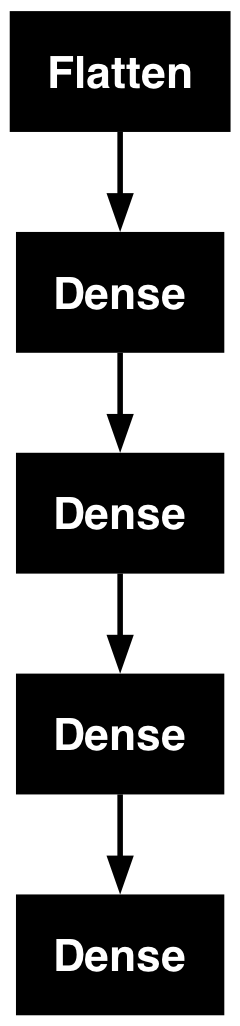

In [58]:
utils.plot_model(model)

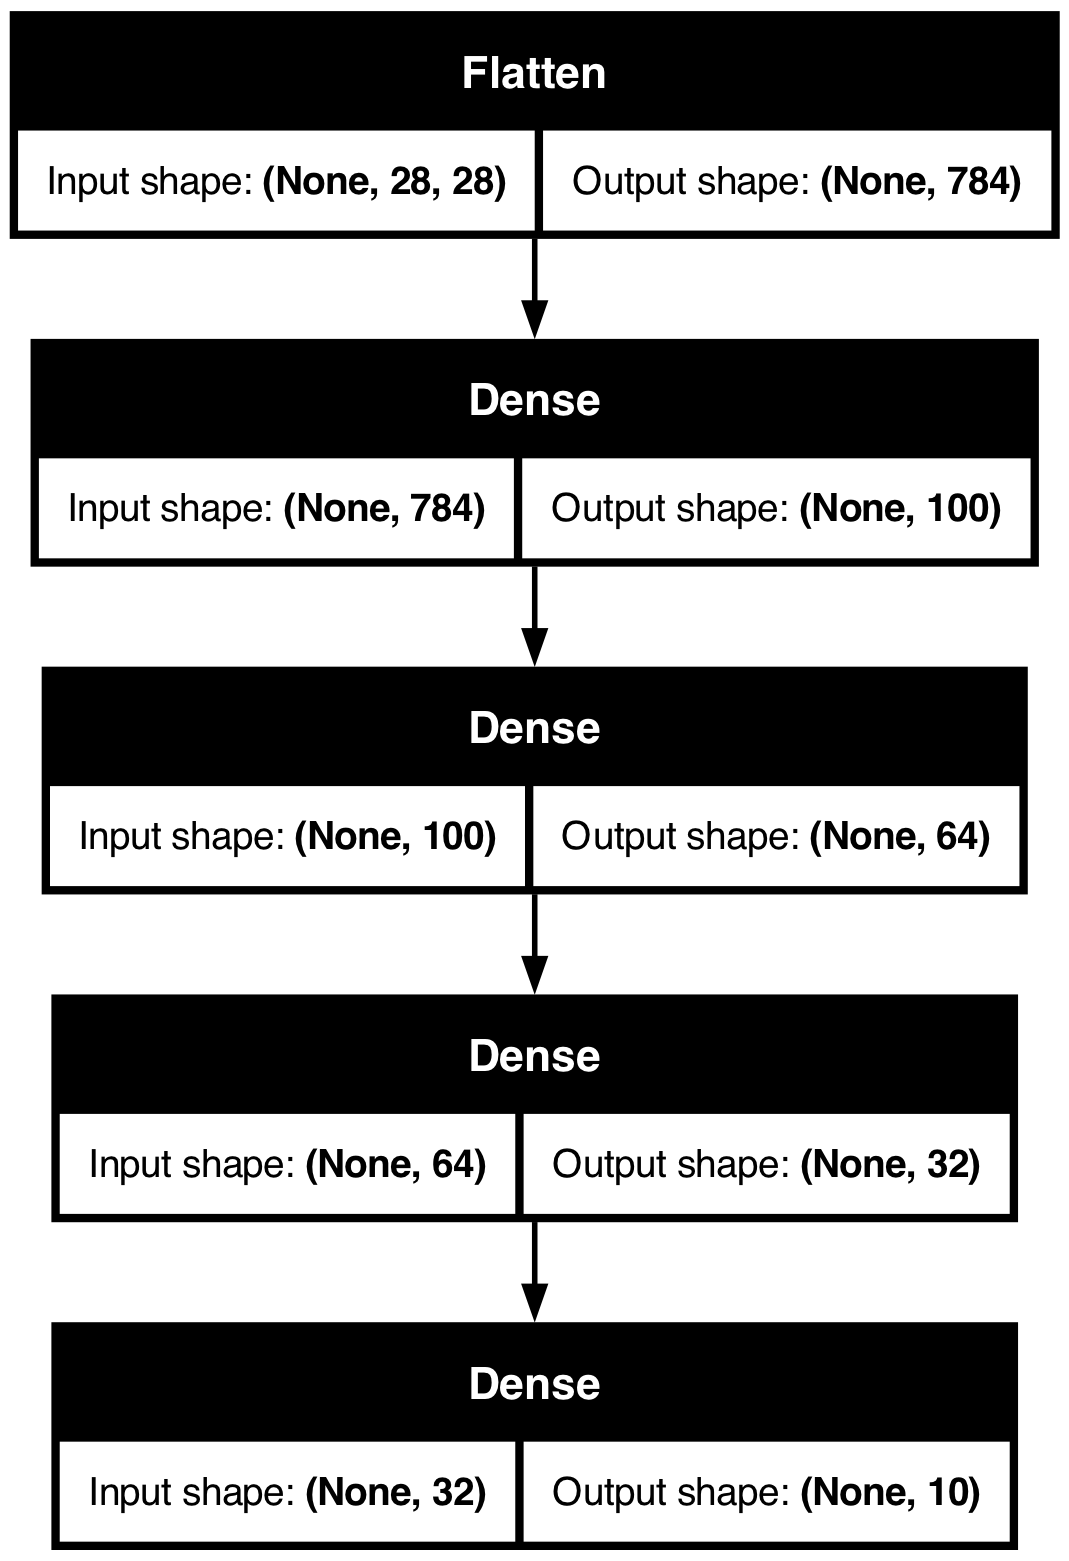

In [59]:
utils.plot_model(model, show_shapes=True)

### 모델 컴파일 및 학습

In [61]:
model.compile(loss=tf.losses.SparseCategoricalCrossentropy(),
              optimizer="sgd",
              metrics=["accuracy"])

In [62]:
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=128,
    epochs=50,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=(X_valid, y_valid),
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1
)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3492 - loss: 2.0164 - val_accuracy: 0.7814 - val_loss: 0.9255
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8106 - loss: 0.7497 - val_accuracy: 0.8624 - val_loss: 0.4905
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8750 - loss: 0.4500 - val_accuracy: 0.8879 - val_loss: 0.3975
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8877 - loss: 0.3883 - val_accuracy: 0.8974 - val_loss: 0.3516
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8990 - loss: 0.3466 - val_accuracy: 0.9057 - val_loss: 0.3246
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9100 - loss: 0.3128 - val_accuracy: 0.9111 - val_loss: 0.3053
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9138 - loss: 0.2923 - val_accuracy: 0.9153 - val_loss: 0.2863
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9193 - loss: 0.2766 - val_accuracy: 0.

In [63]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

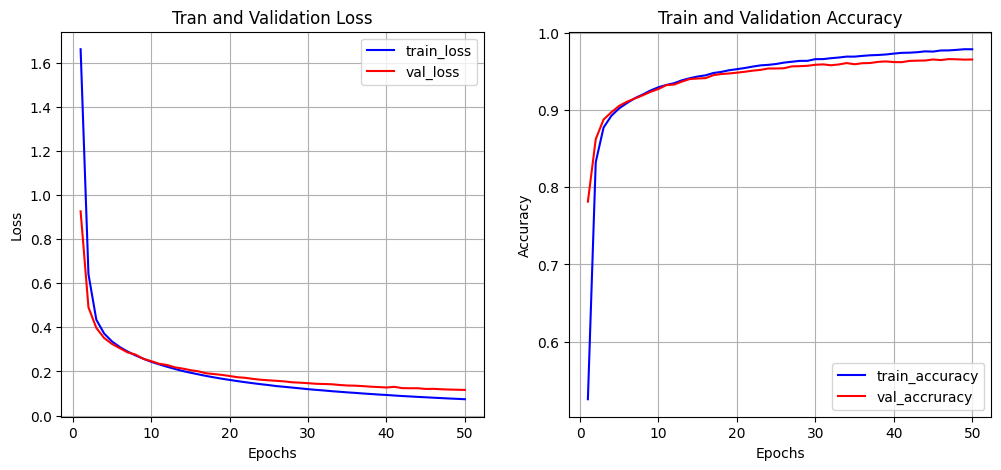

In [66]:
history_dict = history.history

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax_loss = fig.add_subplot(1, 2, 1)
ax_loss.plot(epochs, loss, color="blue", label="train_loss")
ax_loss.plot(epochs, val_loss, color="red", label="val_loss")
ax_loss.set_title("Tran and Validation Loss")
ax_loss.set_xlabel("Epochs")
ax_loss.set_ylabel("Loss")
ax_loss.grid()
ax_loss.legend()

accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]

ax_acc = fig.add_subplot(1, 2, 2)
ax_acc.plot(epochs, accuracy, color="blue", label="train_accuracy")
ax_acc.plot(epochs, val_accuracy, color="red", label="val_accruracy")
ax_acc.set_title("Train and Validation Accuracy")
ax_acc.set_xlabel("Epochs")
ax_acc.set_ylabel("Accuracy")
ax_acc.grid()
ax_acc.legend()

plt.show()

### 모델 평가 및 예측

In [68]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.9634 - loss: 0.1231


[0.10660040378570557, 0.9682999849319458]

In [69]:
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_pred[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
(10000, 10)
[1.8319939e-06 6.1159983e-07 1.3855580e-03 1.2074712e-03 3.3444005e-07
 4.0316577e-06 5.3378643e-12 9.9726892e-01 1.2648760e-04 4.7600311e-06]


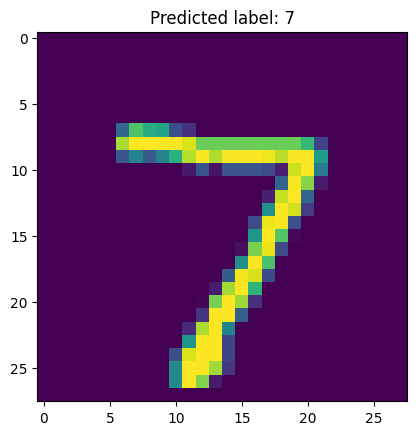

In [70]:
arg_y_pred = np.argmax(y_pred, axis=1)

plt.title(f"Predicted label: {arg_y_pred[0]}")
plt.imshow(X_test[0])
plt.show()

In [72]:
# scikit learn classification report
from sklearn.metrics import classification_report

print(classification_report(np.argmax(utils.to_categorical(y_test), axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.98      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.96      0.96       892
           6       0.96      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



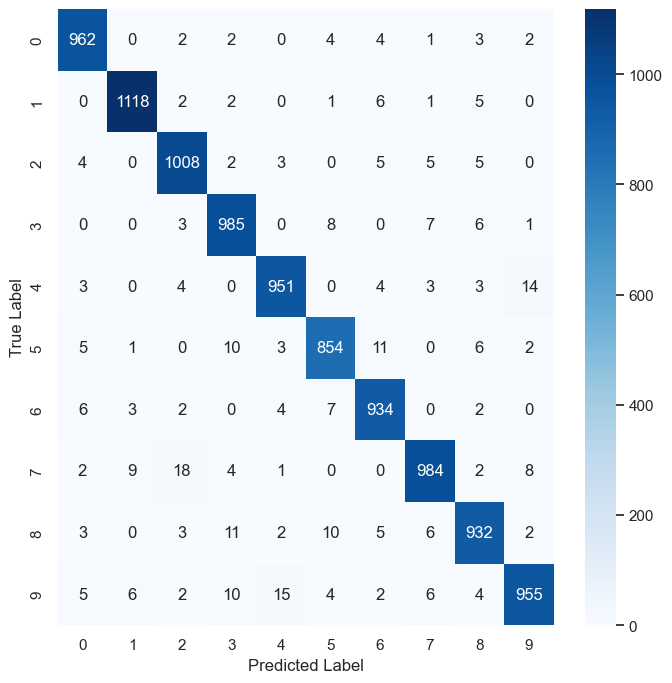

In [75]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.set(style="white")

plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(utils.to_categorical(y_test), axis=1), np.argmax(y_pred, axis=1))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### 모델 저장

In [77]:
model.save("mnist_model.keras")

In [80]:
loaded_model = models.load_model("mnist_model.keras")
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,750 (682.62 KB)

 Trainable params: 87,374 (341.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 87,376 (341.32 KB)

In [81]:
y_pred_2 = loaded_model.predict(X_test)
print(y_pred_2.shape)
print(y_pred_2[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
(10000, 10)
[1.8319939e-06 6.1159983e-07 1.3855580e-03 1.2074712e-03 3.3444005e-07
 4.0316577e-06 5.3378643e-12 9.9726892e-01 1.2648760e-04 4.7600311e-06]


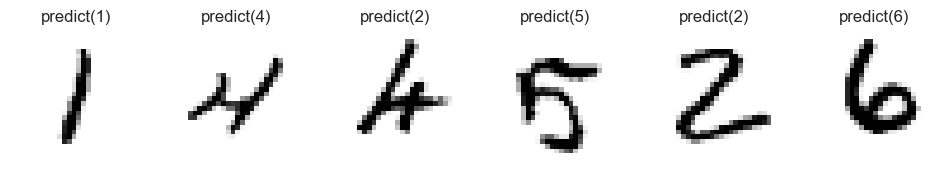

In [89]:
arg_y_pred_2 = np.argmax(y_pred_2, axis=1)

index = np.random.randint(low=0, high=10000, size=6)

fig = plt.figure(figsize=(12, 8))
for i, idx in enumerate(index):
    ax = fig.add_subplot(1, 6, i+1)
    ax.imshow(X_test[idx], cmap="Greys")
    label = arg_y_pred_2[idx]
    ax.set_title(f"predict({label})")
    ax.axis("off")

In [90]:
# json 구조로 모델 저장
model_json = model.to_json()

# json 저장 모델 로드
loaded_model = models.model_from_json(model_json)
predictions = loaded_model.predict(X_test)
print(predictions.shape)
print(predictions[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
(10000, 10)
[0.13192418 0.08092258 0.10122968 0.10037432 0.08594661 0.11476509
 0.09339946 0.09936842 0.09792176 0.09414791]
